m
0.005420558160642424
merr
4.2552611645734036e-05
q
0.0002220569482545431
qerr
0.0001135843910924503


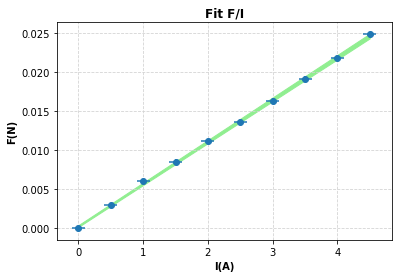

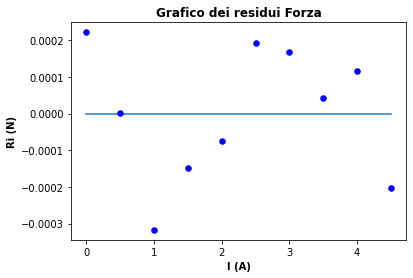

sigma_post_fit
0.00019325164457546898
m
0.005435954108751514
merr
5.251822876761176e-05
q
0.00043167870870908925
qerr
0.00014018530955246816


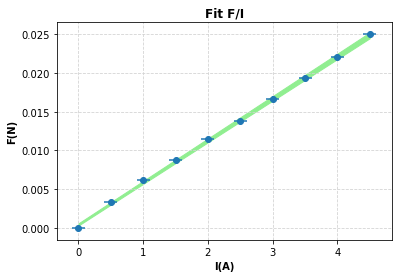

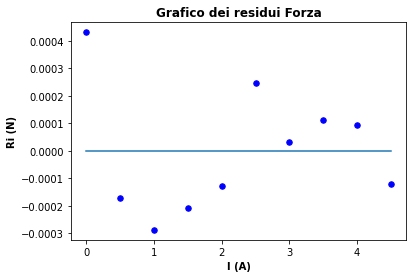

sigma_post_fit
0.0002385102508872495


In [8]:
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.gca()

#gli errori sulle masse considerati sono 0.014*2
#la sigma post fit nelle due simulazioni risulta di poco minore
#quindi è una buona stima dell'errore, forse, un po sovrastimato

F = np.array([0,0.002931151725,0.005960008508,0.008500340004,0.01113837656,0.01358100299,0.0163167446,0.01915019127,0.02178822783,0.02481708461])
F_err = np.ones(10)*2.74E-04
I = np.array([0,0.5,1,1.5,2,2.5,3,3.5,4,4.5])
I_err = np.ones(10)*0.1

plt.title("Fit F/I",fontweight="bold")
plt.xlabel("I(A)",fontweight="bold")
plt.ylabel("F(N)",fontweight="bold")

plt.grid(color='lightgray',linestyle="--",zorder=0)
plt.errorbar(I, F, xerr=I_err, yerr=F_err, fmt='o')

fit,cov = np.polyfit(I,F, 1,w = 1/F_err,cov="True")
merr,qerr = np.sqrt(np.diag(cov))
m,q = fit
deltaYtot = (F_err**2+(m*I_err)**2)**(1/2)
fit,cov = np.polyfit(I,F, 1,w = 1/deltaYtot,cov="True")
merr,qerr = np.sqrt(np.diag(cov))
m,q = fit


print("m")
print(m)
print("merr")
print(merr)
print("q")
print(q)
print("qerr")
print(qerr)


x = np.linspace(0,4.5,1000)

y = q + m*x 

y_erroreMin = (q-qerr) + (m-merr)*x

y_erroreMax = (q+qerr) + (m+merr)*x

plt.fill_between(x,y_erroreMin,y_erroreMax, color="lightgreen",zorder=1)

Ff = q+m*I

Ri = Ff-F

fig = plt.figure()
ax = fig.gca()
plt.title("Grafico dei residui Forza",fontweight="bold")
plt.xlabel("I (A)",fontweight="bold")
plt.ylabel("Ri (N)",fontweight="bold")
plt.plot(np.linspace(0,4.5,1000),np.zeros(1000))
plt.scatter(I,Ri, s=30, color='blue',zorder=3)

plt.show()


sigma_post_fit = (np.sum((Ff-F)**2)/(len(Ff)-2))**(1/2)
print("sigma_post_fit")
print(sigma_post_fit)



fig = plt.figure()
ax = fig.gca()

F = np.array([0,0.003321971955,0.006155418623,0.008793455176,0.01143149173,0.01377641311,0.01670756483,0.01934560139,0.022081343,0.02501249472])
F_err = np.ones(10)*2.74E-04
I = np.array([0,0.5,1,1.5,2,2.5,3,3.5,4,4.5])
I_err = np.ones(10)*0.1

plt.title("Fit F/I",fontweight="bold")
plt.xlabel("I(A)",fontweight="bold")
plt.ylabel("F(N)",fontweight="bold")

plt.grid(color='lightgray',linestyle="--",zorder=0)
plt.errorbar(I, F, xerr=I_err, yerr=F_err, fmt='o')

fit,cov = np.polyfit(I,F, 1,w = 1/F_err,cov="True")
merr,qerr = np.sqrt(np.diag(cov))
m,q = fit
deltaYtot = (F_err**2+(m*I_err)**2)**(1/2)
fit,cov = np.polyfit(I,F, 1,w = 1/deltaYtot,cov="True")
merr,qerr = np.sqrt(np.diag(cov))
m,q = fit


print("m")
print(m)
print("merr")
print(merr)
print("q")
print(q)
print("qerr")
print(qerr)


x = np.linspace(0,4.5,1000)

y = q + m*x 

y_erroreMin = (q-qerr) + (m-merr)*x

y_erroreMax = (q+qerr) + (m+merr)*x

plt.fill_between(x,y_erroreMin,y_erroreMax, color="lightgreen",zorder=1)

Ff = q+m*I

Ri = Ff-F

fig = plt.figure()
ax = fig.gca()
plt.title("Grafico dei residui Forza",fontweight="bold")
plt.xlabel("I (A)",fontweight="bold")
plt.ylabel("Ri (N)",fontweight="bold")
plt.plot(np.linspace(0,4.5,1000),np.zeros(1000))
plt.scatter(I,Ri, s=30, color='blue',zorder=3)

plt.show()


sigma_post_fit = (np.sum((Ff-F)**2)/(len(Ff)-2))**(1/2)
print("sigma_post_fit")
print(sigma_post_fit)